# CAPSTONE PROJECT: Predicción de Popularidad Musical #

## OBJETIVO
***Construir y evaluar modelos de aprendizaje automático para aplicaciones específicas en la industria de la música y el entretenimiento.***

## Ejemplos de Aplicación

### 1. Recomendaciones de Contenido
   - Utilizar modelos para prever la popularidad potencial de nuevas canciones antes de su lanzamiento.
   - Ayudar a compañías discográficas, plataformas de transmisión de música, managers y artistas a tomar decisiones informadas sobre estrategias de lanzamiento y promoción.

### 2. Segmentación de Audiencia
   - Analizar las características de las canciones que contribuyen más a su popularidad.
   - Ayudar a segmentar la audiencia según preferencias específicas y personalizar las recomendaciones de música para diferentes grupos demográficos.

### 3. Optimización de Repertorio
   - Comprender qué características musicales están asociadas con el éxito para tomar decisiones al seleccionar canciones para incluir en los repertorios.

### 4. Estrategias de Marketing
   - Conocer las características que contribuyen al éxito de una canción para desarrollar campañas más efectivas de promoción musical.

### 5. Análisis de Tendencias
   - Utilizar modelos para realizar un análisis de tendencias en la industria musical.

### 6. Colaboraciones Artísticas
   - Ayudar a artistas y productores a tomar decisiones sobre colaboraciones artísticas identificando artistas o géneros que funcionan bien juntos.


In [93]:
# Importaciones básicas
import numpy as np
import pandas as pd
import datetime

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORTACIÓN DE LOS ARCHIVOS ###

In [94]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/PROYECTO_FINAL/SPOTIFY


In [95]:
a = pd.read_csv ('Artists.csv')
b = pd.read_csv ('Top_Songs_US.csv')

### LIMPIEZA y EXPLORACIÓN INICIAL DE DATOS ###

El conjunto de datos seleccionado para este proyecto consta de dos datasets obtenidos de Kaggle, derivados de la extracción de la base de datos a través de la API de Spotify. Estos conjuntos de datos son relevantes para las reproducciones en Estados Unidos en el mes de diciembre del año 2023.

- El primer conjunto de datos, denominado **'Artist'**, proporciona información detallada sobre varios artistas, abarcando aspectos como género, edad, país, géneros musicales, popularidad y cantidad de seguidores.

- El segundo conjunto de datos, llamado **'Top songs'**, contiene información detallada sobre canciones, álbumes y artistas. Incluye información sobre la reproducibilidad, la presencia de contenido explícito (sexual, agresivo, machista, etc.), la duración de las canciones, entre otros aspectos relevantes."

In [96]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9488 entries, 0 to 9487
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9488 non-null   object
 1   ID          9488 non-null   object
 2   Gender      7829 non-null   object
 3   Age         9488 non-null   int64 
 4   Country     6305 non-null   object
 5   Genres      9488 non-null   object
 6   Popularity  9488 non-null   int64 
 7   Followers   9488 non-null   int64 
 8   URI         9488 non-null   object
dtypes: int64(3), object(6)
memory usage: 667.2+ KB


Llevo a cabo un análisis exploratorio de datos en ambos dataframes (df a y df b). Este proceso abarca la revisión de estadísticas descriptivas, la identificación de valores nulos y un análisis general de los datos.

En el proceso de exploración, busco comprender la distribución y la diversidad de las variables en cada dataset. Además, identifico posibles problemas como valores nulos o anomalías que puedan requerir una limpieza posterior. 

Este análisis inicial sienta las bases para un procesamiento de datos más efectivo y una comprensión más profunda de la información contenida en los conjuntos de datos.

In [97]:
# Comprobación de valores nulos en df a
print("Valores nulos en df a:", a.isnull().sum().sum())
print("Valores NaN en df a:", a.isna().sum().sum())

# Comprobación de valores duplicados en df a
duplicados_a = a.duplicated()
print("Duplicados en df a:", duplicados_a.sum())

# Comprobación de valores nulos en df b
print("Valores nulos en df b:", b.isnull().sum().sum())
print("Valores NaN en df b:", b.isna().sum().sum())

# Comprobación de valores duplicados en df b
duplicados_b = b.duplicated()
print("Duplicados en df b:", duplicados_b.sum())

Valores nulos en df a: 4842
Valores NaN en df a: 4842
Duplicados en df a: 0
Valores nulos en df b: 0
Valores NaN en df b: 0
Duplicados en df b: 33109


### Descripción del DataFrame 'a'- Artistas en Spotify (Diciembre 2023) ###

Este DataFrame se obtuvo de Kaggle a mediados de diciembre de 2023 y proviene de la extracción de la base de datos mediante la API de Spotify.

**Resumen General:**

- Número de Filas: 9488
- Número de Columnas: 9

**Columnas y Descripciones:**

- **Name:** Nombre del artista (objeto).
- **ID:** Identificación del artista (objeto).
- **Gender:** Género del artista (objeto).
- **Age:** Edad del artista (entero).
- **Country:** País del artista (objeto).
- **Genres:** Géneros musicales asociados al artista (objeto).
- **Popularity Artist:** Puntuación de popularidad del artista (entero).
- **Followers:** Número de seguidores del artista (entero).
- **URI:** Identificación única de recursos asociada al artista (objeto).


Este conjunto de datos proporciona información detallada sobre varios artistas, abordando aspectos clave que definen su presencia en la plataforma. Contempla factores como género, edad, país de origen, géneros musicales, popularidad y seguidores, brindando una visión profunda de la diversidad y popularidad de los artistas en Spotify.

Un análisis detallado del mismo, resultará crucial para comprender la dinámica artística en la plataforma y sus implicaciones.

**Limpieza de Valores Nulos y Duplicados:**

En esta fase, se abordaron los valores nulos y duplicados en el conjunto de datos. Se implementaron las siguientes acciones:

Se reemplazó el 17% de los valores nulos en la columna "Gender" con la categoría 'desconocido', y se aplicó un enfoque similar reemplazando el 34% de los valores nulos en la columna "Country" por 'Otros'.

Se realizaron ajustes en la categorización de datos cuando se consideró necesario para mejorar la coherencia y completitud del conjunto de datos.

In [98]:
b.drop_duplicates(inplace=True)

In [99]:
a['Gender'] = a['Gender'].fillna('desconocido')
a['Country'] = a['Country'].fillna('otros')

In [100]:
print(a['Gender'].unique()) # falta un 17%
print(a['Country'].unique()) # falta un 34%

['male' 'female' 'mixed' 'other' 'desconocido']
['CA' 'US' 'GB' 'CO' 'PR' 'otros' 'NO' 'FR' 'AU' 'PA' 'SE' 'DE' 'NL' 'BR'
 'DK' 'DO' 'AR' 'MX' 'JM' 'PH' 'KR' 'ES' 'AT' 'IT' 'VE' 'NZ' 'IE' 'TR'
 'CU' 'BE' 'RO' 'IL' 'IN' 'PL' 'JP' 'UY' 'FI' 'ID' 'DZ' 'XK' 'TW' 'SG'
 'AG' 'CL' 'PT' 'ZA' 'NG' 'HK' 'AW' 'AL' 'GR' 'SN' 'BA' 'BD' 'BO' 'LT'
 'UA' 'CN' 'RU' 'IS' 'HU' 'PK' 'CV' 'PE' 'MY' 'HN' 'LV' 'CH' 'BG' 'SK'
 'CD' 'TH' 'MK' 'EE' 'CM' 'VN' 'SI' 'GT' 'JO' 'CZ' 'MD' 'NI' 'HR' 'TN'
 'ML' 'GE' 'AO' 'KZ' 'XE' 'ST' 'GH' 'SR' 'BY' 'VG' 'SB' 'BF' 'XW' 'MA'
 'CI' 'SU' 'IR' 'YU' 'PY']


**Europa** GB, NO, FR, AT, IT, IE, BE, RO, IL, PL, TR, CZ, RU, CH, BG, SK, HU, GR, NL, PT, SE, DK, FI, IS, EE, SI, LT, LV, HR, BA, MK, RS, AL, ME, XK, CY, MT, LU, MC, SM, AD, VA

**América del Sur** CO, BR, VE, AR, CL, UY, PE, BO, EC, PY, GT, HN, SV, NI, CR, PA, CU, DO

**América del Norte** CA, US, MX, PR

**Asia** PH, KR, IN, ID, JP, CN, HK, TW, SG, MY, TH, VN, BD, LK, KH, MM, NP, MN, KZ, UZ, TJ, TM, KG, GE, AM, AZ, BY, UA, MD, AL, PK, BT

**Oceanía**
AU, NZ, FJ, PG, SB, VU, NC, PF

**África** DZ, ZA, NG, CV, SN, BF, CM, CD, TH, MK, EE, CM, VN, SI, GT, JO, CZ, MD, NI, HR, TN, ML, AO, KZ, ST, GH, SR, BY, VG, SB, BF, XW, MA, CI, SU

**sin clasificar** XK', 'XE', 'ST', 'GH', 'VG' y **otros**



**Observación:** Se destaca que la procedencia geográfica de los grupos musicales abarca todos los continentes, y queda un número mínimo sin clasificar en ningún continente. El resto son los faltantes que se clasificarán en "Otros".

In [101]:
a.head()

,Name,ID,Gender,Age,Country,Genres,Popularity,Followers,URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4
1,Post Malone,246dkjvS1zLTtiykXe5h60,male,25,US,"['dfw rap', 'melodic rap', 'pop', 'rap']",86,43130108,spotify:artist:246dkjvS1zLTtiykXe5h60
2,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,male,29,GB,"['pop', 'singer-songwriter pop', 'uk pop']",87,115998928,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V
3,J Balvin,1vyhD5VmyZ7KMfW5gqLgo5,male,35,CO,"['reggaeton', 'reggaeton colombiano', 'trap la...",83,38028010,spotify:artist:1vyhD5VmyZ7KMfW5gqLgo5
4,Bad Bunny,4q3ewBCX7sLwd24euuV69X,male,26,PR,"['reggaeton', 'trap latino', 'urbano latino']",95,77931484,spotify:artist:4q3ewBCX7sLwd24euuV69X


In [102]:
a.describe().round(0)

,Age,Popularity,Followers
count,9488.0,9488.0,9488.0
mean,19.0,47.0,1233563.0
std,20.0,17.0,4587259.0
min,0.0,0.0,0.0
25%,0.0,37.0,16237.0
50%,14.0,48.0,133590.0
75%,33.0,58.0,732868.0
max,149.0,100.0,115998928.0


**Resumen Estadístico:**

**Recuento (Count):** Todas las columnas tienen 9488 entradas no nulas. No hay valores faltantes.

**Edad (AGE):**
- **Media (Media):** La edad promedio es de 19 años.
- **Desviación Estándar (Std):** La desviación estándar alta indica una dispersión significativa, pero se observa que hay anomalías en los datos.
- **Valores Mínimos (Min):** Hay anomalías en los datos, ya que se registra una edad mínima de 0 y máxima de 149, lo que parece imposible.
- **Valores Máximos (Max):** La edad máxima es 149, lo que resulta improbable para un artista.

**Popularidad (POPULARITY):**
- **Media (Media):** La puntuación promedio de popularidad es de alrededor de 47.
- **Cuartiles (25%, 50%, 75%):** El 25% de los artistas tienen una popularidad inferior a 37, y el 75% tienen una puntuación inferior a 58.

**Seguidores (FOLLOWERS):**
- **Media (Media):** La cantidad promedio de seguidores es de aproximadamente 1'2 Millones.
- **Cuartiles (25%, 50%, 75%):** El 25% de los artistas tienen menos de 16.237 seguidores, y el 75% tienen menos de 732.868 seguidores.

**Análisis de Edad:**
- Existen inconsistencias en los datos de edad, con valores mínimos y máximos poco realistas.
- La mayoría de los artistas son relativamente jóvenes, pero las anomalías en los datos de edad afectan la interpretación.

**Nota:** La fiabilidad del análisis puede estar comprometida debido a las inconsistencias en los datos de edad. Me da a suponer que deberemos prescindir de esta columna para el análisis.

In [103]:
(a['Age'].unique())

array([ 33,  25,  29,  35,  26,  28,  27,  22,  43,  30,  20,  18,   8,
        40,  23,  24,  21,  36,  37,  12,  32,  34,  44,  52,   0,  47,
        42,  17,  50,  31,  11,  41,   9,  10,  15,   6,  39,   5,   7,
        16,  45,  38,  54,  58,   3,  51,   4,  19,  59,  55,  49,  48,
        92,  78,  14,   2,  69,  74,  13,   1,  46,  82,  71,  75,  84,
        67,  63,  87,  73,  53,  85,  77,  72,  83,  61,  89,  60,  79,
        57,  66,  90,  81,  64,  88,  70,  94,  56,  62,  65,  91,  68,
        76,  80,  86,  96, 123,  93,  97, 149, 110])

In [104]:
# Filtrar el DataFrame para obtener las filas con edades menores de 15 años
young_artists = a[a['Age'] < 15]
young_artists[['Name', 'Age']].T

,14,27,45,48,51,54,58,68,73,79,...,9464,9465,9469,9471,9472,9473,9474,9475,9483,9487
Name,The Chainsmokers,Imagine Dragons,Swae Lee,Major Lazer,Migos,Manuel Turizo,Anne-Marie,Clean Bandit,Offset,Darell,...,Martina Paz,Menchu Lauchengco-Yulo,英仁合唱團,Boujee,Winterkind,Bombotunes,Panama,Pablo Paz,IVAN$ITO,Lakko
Age,8,12,0,12,12,0,0,12,0,0,...,0,0,5,0,0,0,10,0,0,0


- Apreciamos muchas edades inferiores a la mayoría de edad, están erróneas seguro.

Busco los artistas cuya edad es por debajo los 15 años, porque no cuadra y veo la media: 

- The Chainsmokers 31 de diciembre de 1989) y Alex Pall (Nueva York, 16 de mayo de 1985). 35 años
- DAN (IMAGINE DRAGONS) nació el 14 de julio en 1987 en Las ...  36 años
- Swae Lee NACIDO EL 7 de juny del 1993 (30 años)
- Major Lazer diplo 10 de noviembre de 1978 (45 años)
- Migos (nacido 2 de abril de 1991 (32 años)
- Manuel Turizo (Montería, 12 de abril de 2000)
- Anne-Marie  Essex, Inglaterra, 7 de abril de 1991)
- Clean Bandit  10 de diciembre de 1985 (38 años)
- Offset Georgia, 14 de diciembre de 1991 (32 años)
- Darell (Puerto Rico, 5 de enero de 1990) (33 años)
- Twenty One Pilots  1 de diciembre de 1988  (35 años)
- Paulo Londra (Córdoba, 12 de abril de 1998) (25 años)
- Piso 21  20 de enero de 1990  (33 años)
- Tones And I 3 de mayo de 1993 (30 años) 
- Mount Martha, Victoria,
- 5 Seconds of Summer 16 de julio de 1996 (29 años)
- Bastille 14 de julio de 1986 (37 años)
- Rauw Alejandro  (San Juan, Puerto Rico; 10 de enero de 1993) (30 años)
- Cheat Codes (35 años)
- Rae Sremmurd  nacido el 29 de diciembre de 1991
- Lukas Graham 18 de septiembre de 1988) 35
- Mau y Ricky l 21 de noviembre de 1990) 33
- One Direction 13 de septiembre de 1993  30
- Little Mix 4 de octubre de 1991  32
- Maiara & Maraisa 31 de diciembre de 1987)  35
- BLACKPINK 3 de enero de 1995)  28

Quedan por encontrar varias más, 
- Goodboys, MEDUZA, CNCO, Rafa Pabön, Galantis, Rudimental, Dan + Shay, Morat, Nio Garcia, Jhayco, Axwell /\ Ingrosso, Casper Magico, Dynoro, DNCE, SAINt JHN, Jowell & Randy,  X Ambassadors,  The Supremes ,  Kris Kross Amsterdam,  Sandro Cavazza  , Ezhel ,  Y2K  ,   KYLE   ,  PNL  ,  Disclosure , Regard ,   Loud Luxury, LANY, Polo G , Brandon Lake, Cali Y El Dandee, Jack Ü, Chris Jedi, Simone Mendes, Starley, Dakota Lotus, Ryan Riback, Mike Perry, The Greatest Showman Ensemble, WATTS, ANAVITÓRIA, Seeb, Zé Neto & Cristiano, Florida Georgia Line, BTS, Matheus & Kauan, Mambo Kingz, Fifth Harmony, Lil Pump  Henrique & Juliano .....

Pero llegado el punto, y sintiéndolo mucho, no contaremos con esta información.

In [105]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 12891
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Album Type          4037 non-null   object
 1   Artist ID           4037 non-null   object
 2   Artist Name         4037 non-null   object
 3   Artist Song Rank    4037 non-null   int64 
 4   Track Name          4037 non-null   object
 5   Is Playable         4037 non-null   bool  
 6   Album Name          4037 non-null   object
 7   Release Date        4037 non-null   object
 8   Total Album Tracks  4037 non-null   int64 
 9   Is Explicit         4037 non-null   bool  
 10  ISRC                4037 non-null   object
 11  Song Duration       4037 non-null   int64 
 12  Track Number        4037 non-null   int64 
 13  Popularity          4037 non-null   int64 
 14  Track Id            4037 non-null   object
 15  Track URI           4037 non-null   object
dtypes: bool(2), int64(5), o

Dado que observamos un índice de popularidad en este DataFrame, pero esta vez referente al artista, procedemos a renombrar las columnas en ambos DataFrames para clarificar a qué popularidad se hace referencia.

In [106]:
a.rename(columns={'Popularity': 'Popularity Artist'}, inplace=True)

In [107]:
b.rename(columns={'Popularity': 'Popularity Song'}, inplace=True)

### Descripción del DataFrame 'b'.- Top Songs - Spotify (Diciembre 2023) ###

Este DataFrame se obtuvo de Kaggle a mediados de finales de 2023 y proviene de la extracción de la base de datos mediante la API de Spotify. Proporciona información detallada sobre las principales canciones en la plataforma. Recogiendo las 10 canciones Top por cada artista.

**Resumen General:**

- Número de Filas: 12891
- Número de Columnas: 16

**Columnas y Descripciones:**

- **Album Type:** Tipo de álbum (objeto).
- **Artist ID:** Identificación del artista (objeto).
- **Artist Name:** Nombre del artista (objeto).
- **Artist Song Rank:** Rango de la canción del artista (entero).
- **Track Name:** Nombre de la canción (objeto).
- **Is Playable:** Indicador de si la canción es reproducible (booleano).
- **Album Name:** Nombre del álbum (objeto).
- **Release Date:** Fecha de lanzamiento del álbum (objeto).
- **Total Album Tracks:** Número total de pistas en el álbum (entero).
- **Is Explicit:** Indicador de si la canción es explícita, incluye lenguaje fuerte, contenido sexual, violencia o temas controvertidos (booleano).
- **ISRC:** Código de grabación estándar internacional (objeto).
- **Song Duration:** Duración de la canción en segundos (entero).
- **Track Number:** Número de la pista en el álbum (entero).
- **Popularity Song:** Puntuación de popularidad de la canción (entero). SERÁ NUESTRO TARGET.
- **Track Id:** Identificación de la pista (objeto).
- **Track URI:** Identificación única de recursos asociada a la pista (objeto).


Las columnas brindan detalles sobre el nombre y la ID del artista, así como el nombre de sus canciones y álbum. También incluyen información sobre la fecha de lanzamiento y el total de pistas en el álbum. Los identificadores de grabación, pista y canción son números de referencia que no son necesarios para nuestro análisis.

Además, las columnas proporcionan información relevante sobre la capacidad de reproducción, la presencia de contenido explícito, la duración de la canción y el nivel de popularidad. 

In [108]:
b.describe().round(0)

,Artist Song Rank,Total Album Tracks,Song Duration,Track Number,Popularity Song
count,4037.0,4037.0,4037.0,4037.0,4037.0
mean,5.0,11.0,205171.0,5.0,69.0
std,3.0,9.0,50585.0,6.0,13.0
min,1.0,1.0,47354.0,1.0,0.0
25%,3.0,1.0,173419.0,1.0,62.0
50%,5.0,12.0,199746.0,3.0,71.0
75%,8.0,16.0,228000.0,7.0,78.0
max,10.0,165.0,682816.0,164.0,99.0


**Resumen Estadístico:**

**Recuento (Count):** Todas las columnas tienen 4037 entradas no nulas. No hay valores faltantes.

**Posición en las Listas de Reproducción:**

- La posición promedio de las canciones de los artistas es 5.0, sugiriendo que, en general, las canciones tienen una posición central en las listas de reproducción.
- La variabilidad en las posiciones indica que algunas canciones pueden tener una posición destacada, mientras que otras pueden estar más atrás en las listas.

**Tamaño de Álbum:**

- La media de 11 pistas por álbum indica que los álbumes tienden a tener un tamaño moderado.
- La variabilidad en el número de pistas entre álbumes, indicada por la desviación estándar, sugiere que algunos álbumes pueden tener muchas más pistas que otros. 
- Observamos un máximo de 165 pistas, que parece imposible, luego procederemos a un estudio más detallado para determinar si se trata de un error.

**Duración de las Canciones:**

- La duración promedio de las canciones es de aproximadamente 3 minutos y 25 segundos (viene representada en milisegundos), con una variabilidad representada por la desviación estándar.
- La distribución de la duración de las canciones, según los percentiles, muestra que la mayoría de las canciones caen en un rango específico, pero hay variabilidad en las duraciones extremas.

**Posición de la Pista en el Álbum:**

- La posición promedio de las canciones en un álbum es 5, indicando que, en general, las canciones están distribuidas a lo largo del álbum.
- La variabilidad en las posiciones de las pistas sugiere que algunos álbumes pueden tener una estructura más diversa en términos de la disposición de las canciones.

**Popularidad de las Canciones:**

- La popularidad promedio de las canciones es 69, indicando un nivel moderado de popularidad en general.
- La variabilidad en la popularidad, representada por la desviación estándar, sugiere que algunas canciones son más populares que otras.

- **Estudio detallado sobre el número de Tracks máximo** 

In [109]:
b_menor_igual_25 = b[b['Total Album Tracks'] <= 25]
b_entre_25_y_53 = b[(b['Total Album Tracks'] > 25) & (b['Total Album Tracks'] <= 53)]
b_entre_54_y_87 = b[(b['Total Album Tracks'] > 53) & (b['Total Album Tracks'] <= 87)]
b_entre_88_y_165 = b[(b['Total Album Tracks'] > 87) & (b['Total Album Tracks'] <= 165)]

print(f'Filas con 25 o menos tracks: {len(b_menor_igual_25)}')
print(f'Filas con entre 25 y 53 tracks: {len(b_entre_25_y_53)}')
print(f'Filas con entre 54 y 87 tracks: {len(b_entre_54_y_87)}')
print(f'Filas con entre 88 y 165 tracks: {len(b_entre_88_y_165)}')

Filas con 25 o menos tracks: 3908
Filas con entre 25 y 53 tracks: 124
Filas con entre 54 y 87 tracks: 4
Filas con entre 88 y 165 tracks: 1


In [110]:
valor_165 = 165
fila_duda = b[b['Total Album Tracks'] == valor_165]
fila_duda

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
2867,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,10,"Ave Maria, D839 - Remastered 2013",True,Franz Schubert - A Monument of Classics,2022-10-07,165,False,GBF071301780,289999,164,45,5yGHhF5C64ExdUuc2zWvPe,spotify:track:5yGHhF5C64ExdUuc2zWvPe


- ¿Cómo puede estar Luciano Pavarotti, clasificado en género Pop para la canción de Ave María por muy remasterizada que esté y procedencia, Jamaica?
compruebo todas sus referencias para saber si se trata de un error de mala clasificación de los datos o que hay datos erróneos.

In [111]:
pistas_pavarotti = a[a['Name'] == 'Luciano Pavarotti']
pistas_pavarotti 

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI
286,Luciano Pavarotti,0Y8KmFkKOgJybpVobn1onU,male,55,JM,"['canzone napoletana', 'classical tenor', 'ita...",61,916854,spotify:artist:0Y8KmFkKOgJybpVobn1onU


- Buscando el álbum, si existe y es una compilación de 165 pistas, entonces es correcto, solo que hay que cambiar el país a italia y género ópera o directamente otros. 

In [112]:
# Cambiar país a "IT" para todas las filas relacionadas con Luciano en el DataFrame a
a.loc[a['Name'] == 'Luciano Pavarotti', 'Country'] = 'IT'

# Cambiar género a "Opera" en el DataFrame a
a.loc[a['Name'] == 'Luciano Pavarotti', 'Genres'] = 'Opera'

In [113]:
pistas_pavarotti = b[b['Artist Name'] == 'Luciano Pavarotti']
pistas_pavarotti

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
2858,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,1,"Turandot, SC 91, Act III: Nessun dorma!",True,Nessun Dorma - Puccini's Greatest Arias,1993-01-01,14,False,GBF077230201,180493,1,45,3DtphM0BKeGoECEgB4YXqM,spotify:track:3DtphM0BKeGoECEgB4YXqM
2859,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,2,"Rigoletto, Act III: La donna è mobile",True,Verdi,2020-03-06,30,False,GBF077130101,141600,1,51,5cR6xfzyicyDyAr52zB48k,spotify:track:5cR6xfzyicyDyAr52zB48k
2860,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,3,We Are The World - Live,True,Spirito Italiano,2020-04-04,74,False,GBF079910780,350866,73,61,0HEC0KkDwxtucNsufufCys,spotify:track:0HEC0KkDwxtucNsufufCys
2861,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,4,My Way,True,My Way (50th Anniversary Edition),1969-03-01,14,False,USCA29502321,212840,12,59,3N3xHMAngaQq1htw6oSmnt,spotify:track:3N3xHMAngaQq1htw6oSmnt
2862,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,5,Caruso,True,Tutto Pavarotti,1988-01-01,31,False,GBF078810720,319493,1,53,5hV0uMeGIUtKASyf25htAo,spotify:track:5hV0uMeGIUtKASyf25htAo
2863,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,6,La traviata / Act 1: Libiamo ne'lieti calici,True,Verdi: La Traviata,1980-01-01,24,False,GBF077930103,167026,3,39,2zGVfygrdGVKCZ54sxCaQH,spotify:track:2zGVfygrdGVKCZ54sxCaQH
2864,single,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,7,'O sole mio (Arr. Chiaramello),True,'O sole mio,1979-10-01,1,False,GBF077900300,202680,1,52,0KFPsX30uBNCDpkgdz0JrV,spotify:track:0KFPsX30uBNCDpkgdz0JrV
2865,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,8,Nessun Dorma,True,The Maestro,2014-10-09,17,False,DELJ81475419,192133,15,48,6g8bCyaXkRpreRI397DfWk,spotify:track:6g8bCyaXkRpreRI397DfWk
2866,album,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,9,"Baby, can I hold you tonight",True,Pavarotti & Friends for Cambodia and Tibet,2007-01-01,20,False,GBBBB5000004,211960,8,33,7EphvqYS0DPdZnncTFJz1X,spotify:track:7EphvqYS0DPdZnncTFJz1X
2867,compilation,0Y8KmFkKOgJybpVobn1onU,Luciano Pavarotti,10,"Ave Maria, D839 - Remastered 2013",True,Franz Schubert - A Monument of Classics,2022-10-07,165,False,GBF071301780,289999,164,45,5yGHhF5C64ExdUuc2zWvPe,spotify:track:5yGHhF5C64ExdUuc2zWvPe


In [114]:
print(f'Tamaño actual de a: {a.shape}')
print(f'Tamaño actual de b: {b.shape}')

Tamaño actual de a: (9488, 9)
Tamaño actual de b: (4037, 16)


In [115]:
b.head(2)

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,album,3TVXtAsR1Inumwj472S9r4,Drake,1,IDGAF (feat. Yeat),True,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,album,3TVXtAsR1Inumwj472S9r4,Drake,2,First Person Shooter (feat. J. Cole),True,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU


**Compruebo variabilidad de dos variables en concreto**:

In [116]:
b['Is Explicit'].value_counts()

False    2522
True     1515
Name: Is Explicit, dtype: int64

- La presencia de contenido explícito, indicada por la columna "Is Explicit", puede ofrecer información valiosa sobre la posible relación entre la popularidad de las canciones y su contenido provocativo.

In [117]:
b['Is Playable'].value_counts() 

True    4037
Name: Is Playable, dtype: int64

- Observamos que todas las canciones del dataset son etiquetadas como reproducibles ('Is Playable'). Dado que esta información no aporta variabilidad al estudio, se sugiere eliminar esta fila para optimizar el análisis y reducir redundancias en los datos.

Para hacer una visualización de la correlación mostraré **momentáneamente** una transformación con el codificador de etiquetas **(Label Encoder)** para convertir todas las categorías en valores numéricos, proporcionando así una visión rápida de las correlaciones en el conjunto de datos. Eso me ayudará con todas las columnas ID a detectar referencias repetidas que podré eliminar del df.

In [118]:
le = preprocessing.LabelEncoder()
a_lab = a.apply(le.fit_transform)
b_lab =b.apply(le.fit_transform)

In [119]:
a_lab.head()

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI
0,2281,4276,2,33,15,1016,92,9077,4276
1,6851,2492,2,25,92,1867,86,9061,2492
2,2386,8062,2,29,34,3596,87,9082,8062
3,3676,2346,2,35,22,3716,83,9053,2346
4,814,5900,2,26,73,3724,92,9075,5900


In [120]:
b_lab.head()

,Album Type,Artist ID,Artist Name,Artist Song Rank,Track Name,Is Playable,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,0,180,100,0,1474,0,814,1118,22,1,2908,3135,6,87,1205,1205
1,0,180,100,1,1087,0,814,1118,22,1,2907,3003,5,85,3488,3488
2,0,180,100,2,2566,0,814,1118,22,1,2910,3407,19,83,922,922
3,0,180,100,3,1570,0,991,942,13,1,2871,2366,13,83,1551,1551
4,0,180,100,4,2270,0,2293,348,19,0,2143,922,11,83,934,934


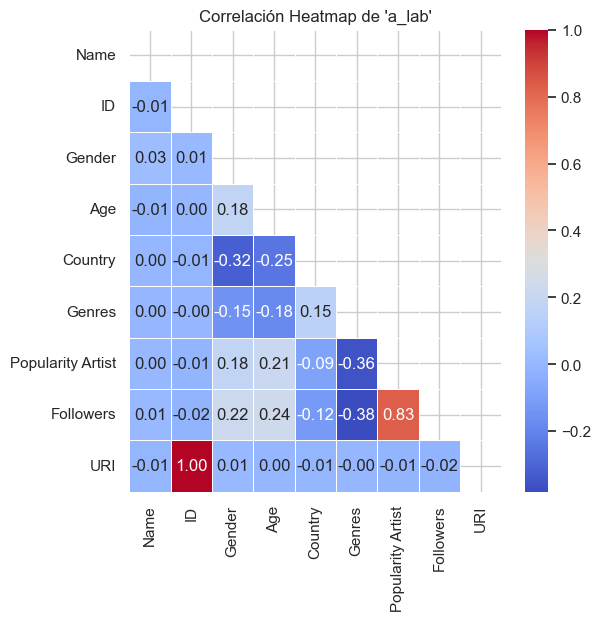

In [121]:
corr_matrix = a_lab.corr()

# Crear una máscara triangular superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear el heatmap con la máscara
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", ax=ax, mask=mask)

plt.title("Correlación Heatmap de 'a_lab'")
plt.show()


- Observamos una relación entre las columnas ID y URI, lo que sugiere la posibilidad de eliminar una de estas columnas para evitar redundancias en el conjunto de datos.

- Además, destacamos una fuerte correlación entre el número de seguidores (Followers) y la popularidad del artista (Popularity Artist). Este resultado es coherente y esperado, ya que artistas con más seguidores tienden a tener una mayor popularidad. Este hallazgo respalda la lógica del comportamiento en plataformas musicales como Spotify.


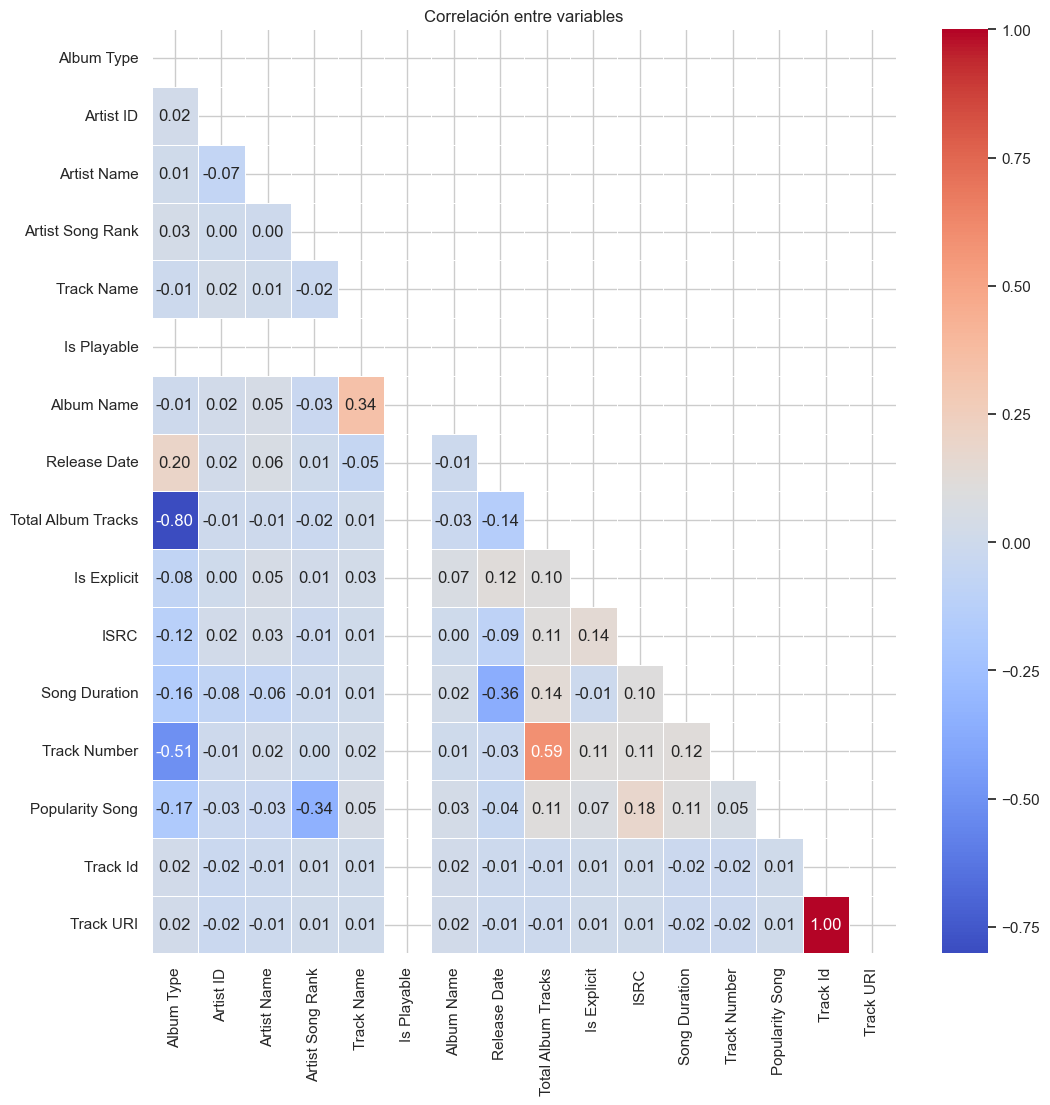

In [122]:
# Crea el heatmap
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 12))

# Calcula la matriz de correlación
corr_matrix = b_lab.corr()

# Enmascara la mitad superior del heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crea el heatmap con la máscara
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", mask=mask, ax=ax)

plt.title("Correlación entre variables")
plt.show()

- Observamos una relación directa entre las columnas Track Id y Track URI, indicando redundancia en la información. Se sugiere la posibilidad de eliminar una de las dos columnas para simplificar el conjunto de datos.

- Adicionalmente, notamos una fuerte correlación entre el número total de pistas de un álbum (Total Album Tracks) y el tipo de álbum (Album Type). Este resultado es coherente, ya que un álbum clasificado como "single" generalmente tiene solo una pista. Considerando esta correlación, podríamos evaluar la eliminación de una de estas columnas para reducir la redundancia de información.

In [123]:
print(a.columns)
print (b.columns)

Index(['Name', 'ID', 'Gender', 'Age', 'Country', 'Genres', 'Popularity Artist',
       'Followers', 'URI'],
      dtype='object')
Index(['Album Type', 'Artist ID', 'Artist Name', 'Artist Song Rank',
       'Track Name', 'Is Playable', 'Album Name', 'Release Date',
       'Total Album Tracks', 'Is Explicit', 'ISRC', 'Song Duration',
       'Track Number', 'Popularity Song', 'Track Id', 'Track URI'],
      dtype='object')


- Después de obtener una visión inicial de las correlaciones principales entre variables en ambos dataframes, podemos realizar un **'merge'** considerando las variables que tienen referencias comunes ('ID' Vs. 'Artist ID'). Este paso permitirá consolidar la información de ambos conjuntos de datos, facilitando análisis más integrados y completos.

In [124]:
# Uno dataframes basados en alguna columna común (por ejemplo, 'ID' en df a y 'Artist ID' en df b)
merged= pd.merge(a, b, left_on='ID', right_on='Artist ID', how='inner')
merged.head(2)

,Name,ID,Gender,Age,Country,Genres,Popularity Artist,Followers,URI,Album Type,...,Album Name,Release Date,Total Album Tracks,Is Explicit,ISRC,Song Duration,Track Number,Popularity Song,Track Id,Track URI
0,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06,23,True,USUG12306072,260111,7,93,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE
1,Drake,3TVXtAsR1Inumwj472S9r4,male,33,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,spotify:artist:3TVXtAsR1Inumwj472S9r4,album,...,For All The Dogs,2023-10-06,23,True,USUG12306071,247444,6,91,7aqfrAY2p9BUSiupwk3svU,spotify:track:7aqfrAY2p9BUSiupwk3svU


In [125]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                4037 non-null   object
 1   ID                  4037 non-null   object
 2   Gender              4037 non-null   object
 3   Age                 4037 non-null   int64 
 4   Country             4037 non-null   object
 5   Genres              4037 non-null   object
 6   Popularity Artist   4037 non-null   int64 
 7   Followers           4037 non-null   int64 
 8   URI                 4037 non-null   object
 9   Album Type          4037 non-null   object
 10  Artist ID           4037 non-null   object
 11  Artist Name         4037 non-null   object
 12  Artist Song Rank    4037 non-null   int64 
 13  Track Name          4037 non-null   object
 14  Is Playable         4037 non-null   bool  
 15  Album Name          4037 non-null   object
 16  Release Date        4037

- Hemos obtenido un nuevo dataframe llamado 'merge' con 4037 entradas y 25 columnas. En este proceso, identificamos que varias columnas pueden eliminarse por redundancia o por no ser relevantes para nuestro análisis.

- Aunque algunas redundancias son evidentes, como la repetición de la columna ID, será necesario realizar un análisis más detallado de otras columnas para determinar cuáles deben ser eliminadas y cuáles aportan información valiosa.

In [126]:
merged['Album Type'].unique()

array(['album', 'single', 'compilation'], dtype=object)

- Observamos que la columna 'Album Type' presenta tres tipos diferentes de álbums. Esta información, aunque sugiere la existencia de diversidad en la clasificación de álbums, no será importante considerarla para el estudio de Popularidad de una canción.

**PASO IMPORTANTE: SELECCIÓN DE COLUMNAS PARA EL ESTUDIO**

En el proceso de consolidación de datos, se ha decidido **eliminar** las siguientes columnas:

Todos los ID fuera porque ya tengo el nombre del artista y de la canción. No los necesito:
- 'ID'
- 'URI'
- 'Artist ID'
- 'ISRC'
- 'Track Id'
- 'Track URI'

En el caso de: 
- 'Is Playable' (ya que todas las canciones son reproducibles)
- 'Age' (por falta de fiabilidad)
- 'Album Type' y 'Release Date' (información prescindible para el análisis)

Las elimino porque podemos prescindir para el estudio. 
- Se han conservado todas las demás columnas para su utilización en el análisis subsiguiente.

In [127]:
colSI = ['Gender', 'Country', 'Genres', 'Popularity Artist',
                     'Followers', 'Artist Name', 'Artist Song Rank', 'Track Name',
                     'Album Name', 'Total Album Tracks', 'Is Explicit', 'Song Duration',
                     'Popularity Song']

df = merged.loc[:, colSI]
df.head()

,Gender,Country,Genres,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song
0,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,1,IDGAF (feat. Yeat),For All The Dogs,23,True,260111,93
1,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,2,First Person Shooter (feat. J. Cole),For All The Dogs,23,True,247444,91
2,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),For All The Dogs,23,True,319191,89
3,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,4,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",14,True,218364,89
4,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,5,One Dance,Views,20,False,173986,89


In [128]:
# Guardar el df en un archivo csv
df_net = "df_net.csv"
df.to_csv(df_net, index=False)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4037 entries, 0 to 4036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              4037 non-null   object
 1   Country             4037 non-null   object
 2   Genres              4037 non-null   object
 3   Popularity Artist   4037 non-null   int64 
 4   Followers           4037 non-null   int64 
 5   Artist Name         4037 non-null   object
 6   Artist Song Rank    4037 non-null   int64 
 7   Track Name          4037 non-null   object
 8   Album Name          4037 non-null   object
 9   Total Album Tracks  4037 non-null   int64 
 10  Is Explicit         4037 non-null   bool  
 11  Song Duration       4037 non-null   int64 
 12  Popularity Song     4037 non-null   int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 414.0+ KB


Hay dos columnas que deberé cambiar de formato antes de aplicar el preprocesado. 
- Artist Song Rank, puesto que actualmente está en formato (int64) pero debe ser tratado como una categoría al ser ordinal. Aquí simplemente se aplicará 'ordinal encoder'.
- Is Explicit, porque es un booleano de true y false, que lo convertiré en categoría para usarlo como binario numérico (true=1, false= 0).

Entonces, así queda nuestro dataset final Limpio, antes del PREPROCESADO:

In [89]:
df.head()

,Gender,Country,Genres,Popularity Artist,Followers,Artist Name,Artist Song Rank,Track Name,Album Name,Total Album Tracks,Is Explicit,Song Duration,Popularity Song
0,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,1,IDGAF (feat. Yeat),For All The Dogs,23,True,260111,93
1,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,2,First Person Shooter (feat. J. Cole),For All The Dogs,23,True,247444,91
2,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,3,Rich Baby Daddy (feat. Sexyy Red & SZA),For All The Dogs,23,True,319191,89
3,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,4,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",14,True,218364,89
4,male,CA,"['canadian hip hop', 'canadian pop', 'hip hop'...",95,83298497,Drake,5,One Dance,Views,20,False,173986,89


Después de completar la limpieza procedemos al EDA (Análisis Exploratorio de Datos), que encontramos en el archivo (2_EDA).